# Fractal Dimension

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def LogisticMapping(x, mu):
    return 4*mu * x * (1-x)


def main(mu, epsilon_list):
    """
    Collect points about the attractor at mu
    Return the set of vectors P_{j} of bin size epsilon
    """
    x = np.random.random()
    while abs(x-0.5) <= 0.01:
        x = np.random.random()
        
    
    # repeat mapping until getting to the attractor
    rep = 1000
    for r in range(rep):
        x = LogisticMapping(x, mu)
    
    
    # Now collect the data points near the attractor
    N_tot = 2**10
    x_list = [x]
    for n in range(N_tot):
        x = LogisticMapping(x, mu)
        x_list.append(x)


    count_list = []
    bins_list = []
    for e in epsilon_list:
        counts, bins = np.histogram(x_list, bins=int(1/e), density=False)
        count_list.append(counts/np.sum(counts))
        bins_list.append(bins)
    return count_list, bins_list




### Test: $\mu = 1$

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_5068/3714124014.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.title(f"Bin size = {round(e_list[e_val],3)}, $\mu$ = 1")


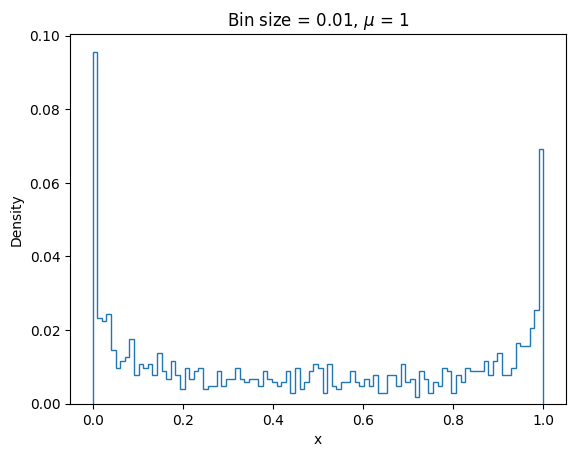

In [4]:
mu = 1
e_list = np.linspace(1, 0.0001, 100)
count_list, bins_list = main(mu, e_list)
e_val = -2
plt.stairs(count_list[e_val], bins_list[e_val])
plt.xlabel("x")
plt.ylabel("Density")
plt.title(f"Bin size = {round(e_list[e_val],3)}, $\mu$ = 1")
plt.show()

## Test $\mu = 0.8$

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_5068/1302653017.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.title(f"Bin size = {round(e_list[e_val], 3)}, $\mu$ = 1")


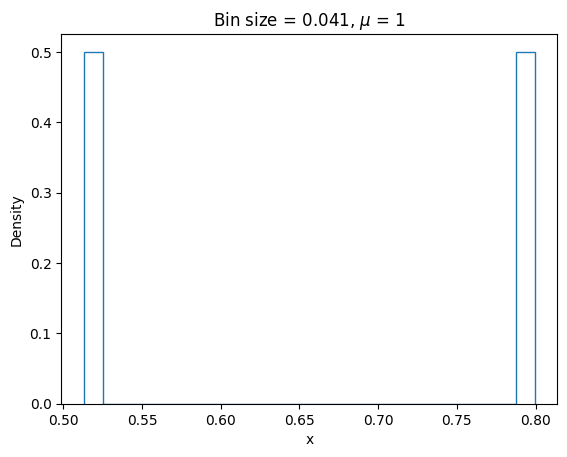

In [5]:
mu = 0.8
e_list = np.linspace(1, 0.001, 100)
count_list, bins_list = main(mu, e_list)
e_val = -5
plt.stairs(count_list[e_val], bins_list[e_val])
plt.xlabel("x")
plt.ylabel("Density")
plt.title(f"Bin size = {round(e_list[e_val], 3)}, $\mu$ = 1")
plt.show()

## Capacity Dimension

The capacity dimension is defined as:

$$ N_{cover} = \frac{V}{\epsilon^{D}} $$

It is very similar to a volume density relation except that we generalize the exponent of the length be the dimensionality of the space.

In [6]:
def count_non_empty(count_list):
    N_e = []
    for l in count_list:
        n = np.count_nonzero(np.array(l))
        N_e.append(n)
    return N_e


def D_capacity(N_e, e_list):
    """
    The capacity dimension 
    """
    d_cap = []
    x_axis = []

    # for i in range(len(N_e)-1):
    #     d_cap.append(-(np.log(N_e[i+1]) - np.log(N_e[i])) / (np.log(e_list[i+1]) - np.log(e_list[i])))
    #     x_axis.append((np.log(e_list[i+1]) + np.log(e_list[i])/2))
    # return d_cap, x_axis

    for i in range(len(N_e)-1):
        d_cap.append(-np.log(N_e[i]) / np.log(e_list[i]))
        x_axis.append((np.log(e_list[i+1]) + np.log(e_list[i])/2))
    return d_cap, x_axis


### For $\mu = 0.9$, the capacity dimension

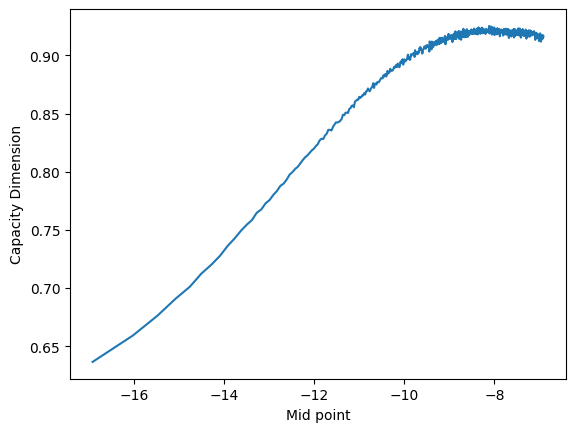

The fractal dimension for mu = 0.9 is 0.9162544563531183


In [13]:
mu = 0.9
e_list = np.linspace(0.01, 0.00001, 1000)

count_list, bins_list = main(mu, e_list)

N_e = count_non_empty(count_list)

d_cap_0, x_axis_0 = D_capacity(N_e, e_list)

plt.plot(x_axis_0, d_cap_0)
plt.ylabel("Capacity Dimension")
plt.xlabel("Mid point")
plt.show()
print(f"The fractal dimension for mu = {mu} is {d_cap_0[0]}")



### For $\mu$ = 0.8, the capacity dimension

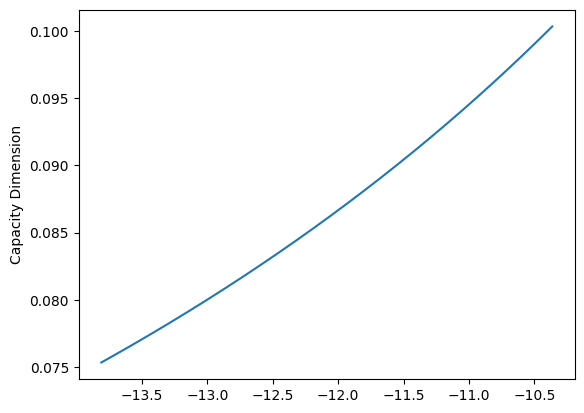

The fractal dimension for mu = 0.8 is 0.10034333188799373


In [20]:
mu = 0.8
e_list = np.linspace(0.001, 0.0001, 1000)

count_list, bins_list = main(mu, e_list)

N_e = count_non_empty(count_list)

d_cap_1, x_axis_1 = D_capacity(N_e, e_list)

plt.plot(x_axis_1, d_cap_1)
plt.ylabel("Capacity Dimension")
plt.show()
print(f"The fractal dimension for mu = {mu} is {d_cap_1[0]}")

For $\mu \approx 0.892486418$

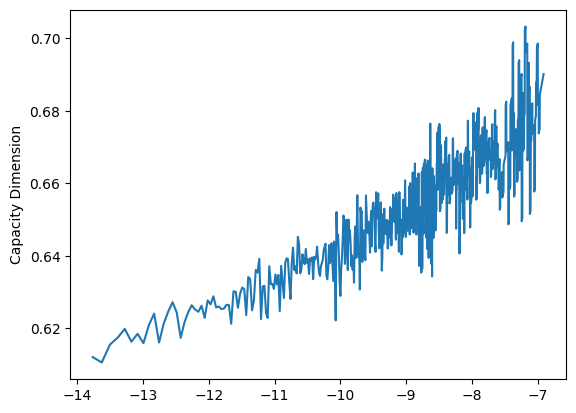

The fractal dimension for mu = 0.892486418 is 0.6901056208558031


In [23]:
mu = 0.892486418
e_list = np.linspace(0.01, 0.0001, 1000)

count_list, bins_list = main(mu, e_list)

N_e = count_non_empty(count_list)

d_cap_2, x_axis_2 = D_capacity(N_e, e_list)

plt.plot(x_axis_2, d_cap_2)
plt.ylabel("Capacity Dimension")
plt.show()
print(f"The fractal dimension for mu = {mu} is {np.array(d_cap_2[0])}")

The capacity dimension is approximately equal to the Feigenbaum attractor number. 

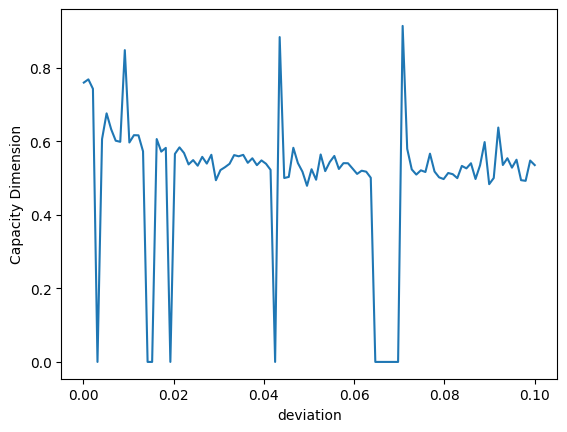

In [56]:
dev = np.linspace(0.0001, 0.1, 100)

mu = 0.892486418
e_list = np.linspace(0.001, 0.01, 10)

d_cap_list = []
for d in dev:
    count_list, bins_list = main(mu+d, e_list)

    N_e = []
    for l in count_list:
        n = np.count_nonzero(np.array(l))
        N_e.append(n)

    d_cap_2, x_axis_2 = D_capacity(N_e[:10], e_list[:10])
    d_cap_list.append(d_cap_2[0])

plt.plot(dev, d_cap_list)
plt.ylabel("Capacity Dimension")
plt.xlabel("deviation")
plt.show()

## Entropy and the Information Dimension